In [1]:
import os, sys
import yaml
import itertools
from collections import defaultdict
from pathlib import Path
# from src.runner import Runner
# from src.eval import Eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def mad(x):
    med = np.median(x)
    return np.median(np.abs(x - med))

In [3]:
base_dir = "/data/jeff-law/projects/2019-04-single-cell/RNMethods"
os.chdir(base_dir)

In [4]:
def summarize(s, cutoff=0, less_than=False):
    print('\t'.join(['median','MAD','cutoff','perc']))
    if less_than:
        perc_pass_cutoff = len(s[s <= cutoff]) / float(len(s))*100
    else:
        perc_pass_cutoff = len(s[s >= cutoff]) / float(len(s))*100
    print("%0.2f\t%0.2f\t%0.2f\t%0.1f" % (s.median(), mad(s.values), cutoff, perc_pass_cutoff))

In [5]:
def summary_plt(df, alg, dataset, measure='AUROC'):
    df[measure].plot.hist(bins=20)
    plt.xlabel(measure)
    plt.title("%s - %s" % (alg, dataset))
    plt.show()
    plt.close()

In [6]:
def get_best_params(df, measure, cutoff, less_than=False):
    best_params = defaultdict(set)
#     params_list = ['l','dT','nl','kw','pz','pr','nr']
    if less_than:
        pass_cutoff = df[df[measure] <= cutoff]['params']
    else:
        pass_cutoff = df[df[measure] >= cutoff]['params']        
    for param in pass_cutoff:
        for i, param_val in enumerate(param.split('-')):
            p = params_list[i]
            val = param_val.replace(p,'')
            best_params[p].add(val)
    print('\t'.join(p for p in params_list))
    print('\t'.join(','.join(best_params[p]) for p in params_list))

In [7]:
def get_param_list(df):
    params_list = []
    for i, param_val in enumerate(df['params'].values[0].split('-')):
        # the parameter name could be multiple letters. Find the first index of a number
        num_idx = min([j for j in range(len(param_val)) if param_val[j].isdigit()])
        p = param_val[:num_idx]
        params_list.append(p)
    return params_list

In [35]:
def plot_heatmap(df, alg, dataset, measure='AUROC'):
    # for GRISLI, since there are only 2 parameters that really matter, make a heamap
    params_df = df.pivot("L","a",measure).sort_index(ascending=False)
    # params_df.head()
    ax = sns.heatmap(params_df)
    plt.title("%s - %s - %s" % (alg, dataset, measure))
    plt.show()
    plt.close()

In [33]:
def get_dataset(eval_file):
    print(eval_file)
    df = pd.read_csv(eval_file, header=0)
    df = df[df['alg'] == alg]
    
    params_list = get_param_list(df)
    print("params list: ", params_list)
    print("%d values" % (len(df)))
    
    # expand the parameters into their own columns
    params_df = df['params'].str.split('-', expand=True)
    # df = df.copy()
    for i, col in enumerate(params_df.columns):
        p = params_list[i]
        df[p] = params_df[col].apply(lambda x: float(x.replace(p,'')))

    return df, params_list

outputs/simulated/HSC/HSC_2000_0/eval.csv
outputs/simulated/HSC/HSC_2000_0/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_1/eval.csv
outputs/simulated/HSC/HSC_2000_1/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_2/eval.csv
outputs/simulated/HSC/HSC_2000_2/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_3/eval.csv
outputs/simulated/HSC/HSC_2000_3/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_4/eval.csv
outputs/simulated/HSC/HSC_2000_4/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_5/eval.csv
outputs/simulated/HSC/HSC_2000_5/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_6/eval.csv
outputs/simulated/HSC/HSC_2000_6/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/simulated/HSC/HSC_2000_7/eval.csv
outputs/simulated/HSC/HSC_2000_7/eval.csv
params list:  ['L', 'R', 'a']
35 values
outputs/

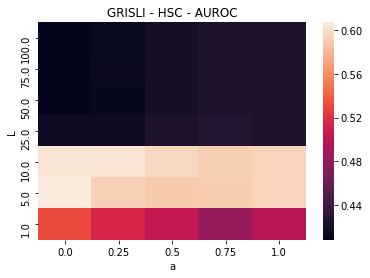

In [52]:
# alg = "SCINGE"
alg = "GRISLI"
# simulations = "dyn-LI"
# simulations = "GSD"
simulations = "HSC"
# simulations = "mCAD"
# simulations = "VSC"
# datasets = ["dyn-LI_500_%d"%i for i in range(10)]
# datasets = ["dyn-LI_2000_%d"%i for i in range(10)]
# datasets = ["simulated/%s/%s_500_%d"% (simulations, simulations, i) for i in range(10)]
datasets = ["simulated/%s/%s_2000_%d"% (simulations, simulations, i) for i in range(10)]
# datasets = ["simulated/%s/%s_5000_%d"% (simulations, simulations, i) for i in range(10)]
# datasets = ["datasets/human/hESC", "datasets/mouse/mEF", "datasets/mouse/mES-PE"]
dfs = []
for dataset in datasets:
    eval_file = "outputs/%s/eval.csv" % (dataset)
    print(eval_file)
    df, params_list = get_dataset(eval_file)
#     plot_heatmap(alg, dataset, measure='AUPRC')
    dfs.append(df)

df_all = pd.concat(dfs)
df_all = df_all.groupby('params').median()
plot_heatmap(df_all, alg, simulations, measure='AUROC')

# df.head()